In [74]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [75]:
iris_df = datasets.load_iris()

In [76]:
print(dir(iris_df))

['DESCR', 'data', 'feature_names', 'target', 'target_names']


In [77]:
print(iris_df.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [78]:
print(iris_df.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [79]:
print(iris_df.target_names)

['setosa' 'versicolor' 'virginica']


In [80]:
label = {0: 'red', 1: 'blue', 2: 'green'}

In [81]:
x_axis = iris_df.data[:, 0]
y_axis = iris_df.data[:, 2]

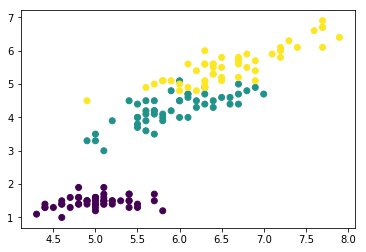

In [82]:
plt.scatter(x_axis, y_axis, c=iris_df.target)

In [83]:
#K_MEANS CLUSTERING
from sklearn import datasets
from sklearn.cluster import KMeans

In [84]:
model = KMeans(n_clusters=3)
model.fit(iris_df.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [85]:
predicted_label = model.predict([[7.2, 3.5, 0.8, 1.6]])

In [86]:
all_predictions = model.predict(iris_df.data)

In [87]:
print(predicted_label)
print(all_predictions)

[1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [88]:
#HIERARCHICAL CLUSTERING DATASET MTCARS

In [1]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, cophenet
import scipy.spatial.distance as dist
from matplotlib import rcParams
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import seaborn as sn
import sklearn.metrics as sm


In [90]:
cars=pd.read_csv("mtcars.csv")

In [91]:
cars.columns

Index(['Unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')

In [92]:
cars = cars.rename(columns={'Unnamed: 0': 'car_names'})
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [93]:
X=cars.iloc[:,[1,3,4,6]].values
Y=cars.iloc[:,9].values

In [94]:
Y

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [113]:
#Linkage used = "WARD"
Z=linkage(X,'ward')
#link=['ward','single','complete','average','centroid']

<function matplotlib.pyplot.show(*args, **kw)>

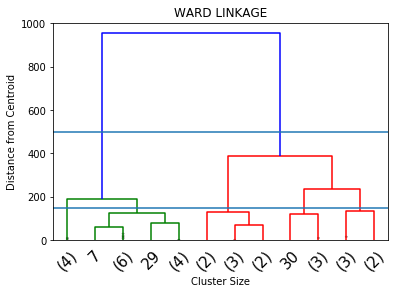

In [114]:
#Distance threshold is set at 150 and 500 to limit cluster sizes
dendrogram(Z,truncate_mode='lastp',p=12,leaf_rotation=45,leaf_font_size=15,show_contracted=True)
plt.xlabel("Cluster Size")
plt.title("WARD LINKAGE")
plt.ylabel("Distance from Centroid")
plt.axhline(y=500)
plt.axhline(y=150)
plt.show

In [125]:
#Clustering WARD AND EUCLIDEAN MEASURE (Numeric only) FOR HIGHEST ACCURACY OPTIMAL K=2 as the longest line b/w linkage
k=2
hcluster=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
hcluster.fit(X)
sm.accuracy_score(Y,hcluster.labels_)

0.78125

In [126]:
hcluster=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='complete')
hcluster.fit(X)
sm.accuracy_score(Y,hcluster.labels_)

0.4375

In [127]:
hcluster=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='average')
hcluster.fit(X)
sm.accuracy_score(Y,hcluster.labels_)

0.78125

In [128]:
#for non numeric parameters binary/multiclass/categorical clustering
hcluster=AgglomerativeClustering(n_clusters=k,affinity='manhattan',linkage='average')
hcluster.fit(X)
sm.accuracy_score(Y,hcluster.labels_)

0.71875

In [ ]:
#HEIRARCHICAL CLUSTERING DATASET

In [2]:
dataset=pd.read_csv("data.csv")

In [3]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/10 8:26,3.39,17850.0,United Kingdom


In [4]:
x=dataset.iloc[0:100000,[3,5]].values

In [ ]:
dendogram_1=(linkage(x,'ward'))

In [ ]:
dendogram_1